# Runtime ≈	1 minute




# This notebook completes the process of wrangling the text for EDA and other future analyses.

# The processing is the following order:
*   Scispacy - Acronyms
*   General Cleaning
* Spacy - Lemmatization

In [1]:
try:
    from google.colab import drive

    drive.mount('./drive/')

    %cd drive/My \ Drive/Text_Summarization

except:
  
    print("No Colab Environment")

No Colab Environment


In [2]:
import json
import pandas as pd
import numpy as np
import re
import seaborn as sns

import matplotlib

matplotlib.rcParams["figure.figsize"] = (20, 7)

# Load Data

In [3]:
with open("./Data/raw/Telehealth_article_texts.txt") as f:
    #Skip header
    for i in range(4):
        next(f) 
    corpus = f.read()

In [4]:
dict_articles = json.loads(corpus.replace("\n",""))
df_articles = pd.DataFrame.from_dict(dict_articles,orient="index",columns=["Content"]).reset_index().drop(columns=["index"])

df_articles.head()

,Content
0,Veterans face a variety of stressors related t...
1,The impact of the COVID-19 pandemic on the chi...
2,"In November 2019, COVID-19—the infectious, hig..."
3,Anxiety and depressive disorders are among the...
4,"In mid-March, 2020, the authors—as well as the..."


In [5]:
df_metadata = pd.read_excel("./Data/raw/Metadata_telehealth_article_key_2.25.xlsx",sheet_name="Tied_to_Notebook",index_col="Index")

df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation
Index,,,,,,,
0,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea..."
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca..."
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo..."
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar..."
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)...."


In [6]:
#Ensure both Indexes are of same type before merge
assert df_metadata.index.dtype == df_articles.index.dtype

#Merge dataframes
df_metadata = df_metadata.merge(df_articles,left_index=True,right_index=True,how="left")

df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content
Index,,,,,,,,
0,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig..."
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the..."


In [7]:
JournalCrosswalk = pd.read_excel('./Data/raw/JournalTitles.xlsx')
JournalCrosswalk.set_index('Journal', inplace=True)

In [8]:
JournalCrosswalk.head()

,Journal Code,Peer Review System,Journal Subfield
Journal,,,
Asian American Journal of Psychology,AAP,EM (AJP),Social Psychology
Journal of Abnormal Psychology,ABN,EM,Clinical & Counseling Psychology
"Psychology of Aesthetics, Creativity, and the Arts",ACA,EM,Social Psychology
Psychology of Addictive Behaviors,ADB,EM,Health Psychology & Medicine
American Psychologist,AMP,EM,General Psychology


In [9]:
df_metadata.dtypes

Journal Title     object
Article Title     object
Date Published     int64
Authors           object
Abstract          object
Keywords          object
Citation          object
Content           object
dtype: object

In [10]:
df_metadata["Content_Length"] = df_metadata["Content"].apply(lambda text: len(text))
df_metadata["Abstract_Length"] = df_metadata["Abstract"].apply(lambda text: len(str(text)))
df_metadata["Parsed_Keywords"] = df_metadata["Keywords"].apply(lambda keywords: str(keywords).replace("\n\n"," ").split()[1:])
df_metadata["Parsed_Keywords_Length"] = df_metadata["Parsed_Keywords"].apply(lambda text: len(text))
df_metadata["Journal Title"] = df_metadata["Journal Title"].replace('Psychological Servies', 'Psychological Services')
subfield = []
for i in df_metadata['Journal Title']:
  print(i)
  try:
    if i == 'Clinical Psychology: Science and Practice': # Journal is missing from Crosswalk
      subfield.append('Clinical & Counseling Psychology')
    else:
      subfield.append(JournalCrosswalk['Journal Subfield'][i])
  except:
    subfield.append('No Match')
    
df_metadata["Subfield"] = subfield

#Have an idea of reference amount per document
df_metadata["et_al_Count"] = df_metadata["Content"].apply(lambda text: len(list(re.finditer("et al",text))))


Psychological Services
Psychology, Public Policy, and Law
Psychology, Public Policy, and Law
Training and Education in Professional Psychology
Practice Innovations
American Psychologist
Psychological Services
Canadian Psychology/Psychologie canadienne
Psychological Assessment
Journal of Psychotherapy Integration
Professional Psychology: Research and Practice
Journal of Psychotherapy Integration
Journal of Psychotherapy Integration
Practice Innovations
Practice Innovations
Journal of Psychotherapy Integration
Professional Psychology: Research and Practice
Professional Psychology: Research and Practice
Professional Psychology: Research and Practice
Professional Psychology: Research and Practice
Rehabilitation Psychology
Psychological Services
Translational Issues in Psychological Science
Clinical Psychology: Science and Practice
Clinical Psychology: Science and Practice
Clinical Psychology: Science and Practice
Clinical Psychology: Science and Practice
American Psychologist
Families, Sys

In [11]:
df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Subfield,et_al_Count
Index,,,,,,,,,,,,,,
0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,37477,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Clinical & Counseling Psychology,50
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,74025,1577,"[remote, child, custody, evaluations,, videoco...",10,Forensic Psychology,48
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",63568,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Forensic Psychology,128
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,30147,1650,"[education, and, training,, telepsychology,, C...",6,Clinical & Counseling Psychology,21
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",42367,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Clinical & Counseling Psychology,14


In [12]:
#troubleshooting
#emental health

#df_metadata["Content"].iloc[2][4633:5000]
#df_metadata["Clean_Content"].iloc[2][4633:5000]

## Acronyms - Include as Vocabulary for Paper

In [13]:
#Sci Spacy
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

#Spacy org
!pip install spacy
!python3 -m spacy download en_core_web_sm
!python3 -m spacy download en_core_web_md


  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz (15.6 MB)


  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.4.0-py3-none-any.whl size=15660353 sha256=9be5c746a0c05a25690fa65489188f5ca0132602d8636957fda091e96e901d8c
  Stored in directory: /Users/adamgoldstein/Library/Caches/pip/wheels/31/4b/3a/03f2732eb69789a7df3bf29c1bc010f660ada5f3c295d4073c
Successfully built en-core-sci-sm


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


## Source: https://youtu.be/2_HSKDALwuw?t=708
## Abbreviation Detector Works by:
## 1. Finding Parentheses
## 2. Look up to 10 words behind the bracket
## 3. Greedily choose definition: Look for words next to each other, that in the right order start with the letters in the acronym

In [14]:
#ScispaCy: Fast and Robust Models for Biomedical Natural Language Processing: https://www.semanticscholar.org/paper/ScispaCy%3A-Fast-and-Robust-Models-for-Biomedical-Neumann-King/de28ec1d7bd38c8fc4e8ac59b6133800818b4e29
#https://github.com/allenai/SciSpaCy
import spacy
from scispacy.abbreviation import AbbreviationDetector


nlp = spacy.load("en_core_web_md")
nlp.add_pipe("abbreviation_detector")

nlp.Defaults.stop_words |= {"PRON","ll","ve","eg"}

corpus = df_metadata["Content"]

docs = list(nlp.pipe(corpus,disable=["ner","parser","textcat"]))




In [15]:
abrv_dict = dict()

for index,doc in enumerate(docs):

    for abrv in doc._.abbreviations:
        
        if str(abrv) not in abrv_dict.keys():

            abrv_dict[str(abrv)] = {"LongForm":str(abrv._.long_form),"Document":{index}}
            
        else:
            abrv_dict[str(abrv)]["Document"].add(index)

        #print(f"{abrv} \t ({abrv.start}, {abrv.end}) {abrv._.long_form} \t Document: {index}")

In [16]:
#Source https://stackoverflow.com/questions/22281059/set-object-is-not-json-serializable

def set_default(obj):
    if isinstance(obj, set):
        return list(obj)
    raise TypeError

In [17]:
#Write original abbriviation dictionary
with open("./references/abbreviation_table.json","w") as f:
    
    json.dump(abrv_dict, f, indent = 4,default=set_default)
    

#Remove misidentified abbreviations
with open("./references/Incorrect_abbrev.json", "r") as f:
    
    misidentified_abrv = json.load(f)
    
for key in misidentified_abrv.keys():
    
    abrv_dict.pop(key)
    
    
#Correct LongForm of abbreviations    
with open("./references/Abbreviation_corrections.json", "r") as f:
    
    correction_abrv = json.load(f)
    

for key in abrv_dict.keys():
    
    if key in correction_abrv.keys():
        
        abrv_dict[key]["LongForm"] = correction_abrv[key]
        

#Add abbreviations
with open("./references/Add_to_abbreviation_table.json", "r") as f:
    
    add_abrv = json.load(f)
    

for key in add_abrv.keys():
    
    abrv_dict[key] = add_abrv[key]
    
    
        
with open("./references/abbreviation_table_processed.json","w") as f:
    
    json.dump(abrv_dict, f, indent = 4, default=set_default)

In [18]:
abrv_dict["PTSD"]["LongForm"]

'posttraumatic stress disorder'

In [19]:
df_abrv = (pd.read_json("./references/abbreviation_table_processed.json")
           .T
           .reset_index()
           .rename(columns={"index":"Term"}))

df_abrv.head()

,Term,LongForm,Document
0,PTSD,posttraumatic stress disorder,"[0, 34, 35, 36, 6, 38, 42, 12, 15, 21, 27]"
1,FTF,face-to-face,"[0, 16]"
2,TAU,treatments as usual,"[0, 40, 21]"
3,PCL,PTSD Checklist,[0]
4,BDI,Beck Depression Inventory,[0]


In [20]:
df_abrv[df_abrv["Term"] == "PTSD"].head()

,Term,LongForm,Document
0,PTSD,posttraumatic stress disorder,"[0, 34, 35, 36, 6, 38, 42, 12, 15, 21, 27]"


In [21]:
#Validation
df_abrv[df_abrv["Term"] == "NYH"]

,Term,LongForm,Document
157,NYH,New York Harbor Healthcare System,NaN


## Clean Data
1.   Lowercase
2.   Remove Punctuation
3.   White Spaces



In [22]:
documents_tokens = []


for index,doc in enumerate(docs):
    
    document_tokens = []
    
    for token in doc:
        
        if not token.is_stop and not token.is_punct:
            
            if str(token) in abrv_dict.keys():
                
                document_tokens.append(abrv_dict[str(token)]["LongForm"])#Replace short-form with long-form
                
            else:
                
                document_tokens.append(token.lemma_)
            
            
    documents_tokens.append(" ".join(document_tokens))

In [23]:
df_metadata["Stopwords_Lemma_Longform_Clean_Content"] = documents_tokens

In [24]:
df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Subfield,et_al_Count,Stopwords_Lemma_Longform_Clean_Content
Index,,,,,,,,,,,,,,,
0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,37477,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,74025,1577,"[remote, child, custody, evaluations,, videoco...",10,Forensic Psychology,48,impact coronavirus disease 2019 pandemic child...
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",63568,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Forensic Psychology,128,November 2019 coronavirus disease 2019 infecti...
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,30147,1650,"[education, and, training,, telepsychology,, C...",6,Clinical & Counseling Psychology,21,anxiety depressive disorder common impair ment...
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",42367,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Clinical & Counseling Psychology,14,mid March 2020 author majority therapist advis...


In [25]:
def unwanted_tokens(text):
    
    docuemnt = text
    
    remove_ngrams = ["large image page new","image page new window", "page new window Download","image page new",
                 "page new window","new window Download","image page","large image","1TABLES figurestablefigure thumbnailtable",
                "FIGUREStable","DOWNLOAD","Download","et al"]
    
    for ngram in remove_ngrams:
        
        docuemnt = docuemnt.replace(ngram,"")
        
    return docuemnt
        
    
    

In [26]:
df_metadata["Clean_Content"] = (df_metadata["Stopwords_Lemma_Longform_Clean_Content"].apply(lambda text: unwanted_tokens(text)))



In [27]:
df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Subfield,et_al_Count,Stopwords_Lemma_Longform_Clean_Content,Clean_Content
Index,,,,,,,,,,,,,,,,
0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,37477,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,74025,1577,"[remote, child, custody, evaluations,, videoco...",10,Forensic Psychology,48,impact coronavirus disease 2019 pandemic child...,impact coronavirus disease 2019 pandemic child...
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",63568,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Forensic Psychology,128,November 2019 coronavirus disease 2019 infecti...,November 2019 coronavirus disease 2019 infecti...
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,30147,1650,"[education, and, training,, telepsychology,, C...",6,Clinical & Counseling Psychology,21,anxiety depressive disorder common impair ment...,anxiety depressive disorder common impair ment...
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",42367,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Clinical & Counseling Psychology,14,mid March 2020 author majority therapist advis...,mid March 2020 author majority therapist advis...


In [28]:
#Add to clean function: Different than a dash ord(8207) compared to 45 for normal dash
print(ord("-"),ord("—"))

45 8212


In [30]:
from yellowbrick.text import DispersionPlot
import sklearn.metrics

#Troubleshooting tokens to remove
dispersion_text = [doc.split() for doc in df_metadata["Clean_Content"]]

other_words = [token.split() for token in ['et al']]

other_words_1D = np.unique(np.concatenate(other_words).reshape(-1))

target_words = other_words_1D

#Create the visualizer and draw the plot
visualizer = DispersionPlot(target_words,ignore_case=False)
_ = visualizer.fit(dispersion_text)

YellowbrickValueError: No indexed words were found in the corpus

In [31]:
df_metadata["Classification"] = (df_metadata["Date Published"].apply(lambda pub_date: "Covid" 
                                                                     if pub_date >= 2020 else "Pre-Covid" ))

In [32]:
df_metadata.to_csv("./Data/processed/Telehealth.csv",index=False)

# Stop

In [25]:
#Helper Functions

import string

def clean_text(text):
    
    corpus =  clean_corpus = re.sub(r'\([^)]*\)', '', text)

    puncs = string.punctuation + "—" #Different than a dash ord(8207) compared to 45 for normal dash

    for punc in puncs:
        
        corpus = corpus.replace(punc," ")
        
    

        
    
    remove_extra_whitespaces = [token.strip() for token in clean_corpus.split()]

    return " ".join(remove_extra_whitespaces).replace('"',"").replace("'","").replace("’","")



def convert_abbreviations(text):
    
    corpus = text

    for abrv in abrv_dict.keys():

        corpus = corpus.replace(str(abrv),abrv_dict[str(abrv)]["LongForm"])


    return corpus



#https://stackoverflow.com/questions/38291313/split-list-from-text-into-ngrams-in-python
def ngrams(text, n):
    words = text.split()
    return [words[i:i+n] for i in range(len(words))]
            
            

In [26]:
df_metadata["RNgrams_Clean_Content"] = df_metadata["RNgrams"].apply(lambda text: clean_text(text))

df_metadata["RNgrams_Clean_Content_LongForm"] = df_metadata["RNgrams_Clean_Content"].apply(lambda text: convert_abbreviations(text))

df_metadata["RNgrams_Clean_Content_LongForm_Length"] = df_metadata["RNgrams_Clean_Content_LongForm"].apply(lambda text: len(text))

df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Subfield,et_al_Count,RNgrams,RNgrams_Clean_Content,RNgrams_Clean_Content_LongForm,RNgrams_Clean_Content_LongForm_Length
Index,,,,,,,,,,,,,,,,,,
0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,37477,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Clinical & Counseling Psychology,50,Veterans face a variety of stressors related t...,Veterans face a variety of stressors related t...,Veterans face a variety of stressors related t...,35659
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,74025,1577,"[remote, child, custody, evaluations,, videoco...",10,Forensic Psychology,48,The impact of the COVID-19 pandemic on the chi...,The impact of the COVID-19 pandemic on the chi...,The impact of the coronavirus disease 2019 pan...,71115
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",63568,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Forensic Psychology,128,"In November 2019, COVID-19—the infectious, hig...","In November 2019, COVID-19—the infectious, hig...","In November 2019, coronavirus disease 2019—the...",57021
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,30147,1650,"[education, and, training,, telepsychology,, C...",6,Clinical & Counseling Psychology,21,Anxiety and depressive disorders are among the...,Anxiety and depressive disorders are among the...,Anxiety and depressive disorders are among the...,27568
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",42367,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Clinical & Counseling Psychology,14,"In mid-March, 2020, the authors—as well as the...","In mid-March, 2020, the authors—as well as the...","In mid-March, 2020, the authors—as well as the...",41246


## Lemmatization

In [27]:
corpus = df_metadata["RNgrams_Clean_Content_LongForm"]

docs = list(nlp.pipe(corpus,disable=["ner","parser","textcat"]))

In [28]:
lemmma_tokens = []


for index, doc in enumerate(docs):

        target_document = [token.lemma_ for token in doc]
        
        td_string = " ".join(target_document)
        
            
        lemmma_tokens.append(td_string)

In [29]:
#Ensure lemma_corpus has same amount of documents as corpus
assert len(lemmma_tokens) == len(corpus)

In [30]:
df_metadata["RNgrams_Clean_Content_LongForm_Lemma"] = lemmma_tokens

df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Subfield,et_al_Count,RNgrams,RNgrams_Clean_Content,RNgrams_Clean_Content_LongForm,RNgrams_Clean_Content_LongForm_Length,RNgrams_Clean_Content_LongForm_Lemma
Index,,,,,,,,,,,,,,,,,,,
0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,37477,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Clinical & Counseling Psychology,50,Veterans face a variety of stressors related t...,Veterans face a variety of stressors related t...,Veterans face a variety of stressors related t...,35659,veteran face a variety of stressor relate to t...
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,74025,1577,"[remote, child, custody, evaluations,, videoco...",10,Forensic Psychology,48,The impact of the COVID-19 pandemic on the chi...,The impact of the COVID-19 pandemic on the chi...,The impact of the coronavirus disease 2019 pan...,71115,the impact of the coronavirus disease 2019 pan...
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",63568,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Forensic Psychology,128,"In November 2019, COVID-19—the infectious, hig...","In November 2019, COVID-19—the infectious, hig...","In November 2019, coronavirus disease 2019—the...",57021,"in November 2019 , coronavirus disease 2019 — ..."
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,30147,1650,"[education, and, training,, telepsychology,, C...",6,Clinical & Counseling Psychology,21,Anxiety and depressive disorders are among the...,Anxiety and depressive disorders are among the...,Anxiety and depressive disorders are among the...,27568,anxiety and depressive disorder be among the m...
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",42367,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Clinical & Counseling Psychology,14,"In mid-March, 2020, the authors—as well as the...","In mid-March, 2020, the authors—as well as the...","In mid-March, 2020, the authors—as well as the...",41246,"in mid - March , 2020 , the author — as well a..."


# Column Below is the Final Transformation

In [31]:
def remove_stopwords(text):

    keep_tokens = []
    
    tokens = text.lower().split(" ")
    
    for token in tokens:
        
        if token not in nlp.Defaults.stop_words:
            
            keep_tokens.append(token)
            
    return " ".join(keep_tokens)

In [32]:
df_metadata["RNgrams_Clean_Content_LongForm_Lemma_Stopwords"] = df_metadata["RNgrams_Clean_Content_LongForm_Lemma"].apply(lambda text: remove_stopwords(text))

df_metadata["Clean_Content"] = df_metadata["RNgrams_Clean_Content_LongForm_Lemma_Stopwords"]


In [34]:
df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Length,Abstract_Length,...,Subfield,et_al_Count,RNgrams,RNgrams_Clean_Content,RNgrams_Clean_Content_LongForm,RNgrams_Clean_Content_LongForm_Length,RNgrams_Clean_Content_LongForm_Lemma,RNgrams_Clean_Content_LongForm_Lemma_Stopwords,Clean_Content,Classification
Index,,,,,,,,,,,,,,,,,,,,,
0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,37477,2411,...,Clinical & Counseling Psychology,50,Veterans face a variety of stressors related t...,Veterans face a variety of stressors related t...,Veterans face a variety of stressors related t...,35659,veteran face a variety of stressor relate to t...,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,74025,1577,...,Forensic Psychology,48,The impact of the COVID-19 pandemic on the chi...,The impact of the COVID-19 pandemic on the chi...,The impact of the coronavirus disease 2019 pan...,71115,the impact of the coronavirus disease 2019 pan...,impact coronavirus disease 2019 pandemic child...,impact coronavirus disease 2019 pandemic child...,Covid
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",63568,1842,...,Forensic Psychology,128,"In November 2019, COVID-19—the infectious, hig...","In November 2019, COVID-19—the infectious, hig...","In November 2019, coronavirus disease 2019—the...",57021,"in November 2019 , coronavirus disease 2019 — ...","november 2019 , coronavirus disease 2019 — inf...","november 2019 , coronavirus disease 2019 — inf...",Covid
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,30147,1650,...,Clinical & Counseling Psychology,21,Anxiety and depressive disorders are among the...,Anxiety and depressive disorders are among the...,Anxiety and depressive disorders are among the...,27568,anxiety and depressive disorder be among the m...,anxiety depressive disorder common impair ment...,anxiety depressive disorder common impair ment...,Covid
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",42367,1871,...,Clinical & Counseling Psychology,14,"In mid-March, 2020, the authors—as well as the...","In mid-March, 2020, the authors—as well as the...","In mid-March, 2020, the authors—as well as the...",41246,"in mid - March , 2020 , the author — as well a...","mid - march , 2020 , author — majority therapi...","mid - march , 2020 , author — majority therapi...",Covid


In [35]:
df_metadata.to_csv("./Data/processed/Telehealth.csv",index=False)

# Trouble Shooting

## Dispersion Plot - Based on Clean_Dataset (Not including abbreviation substitution)

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


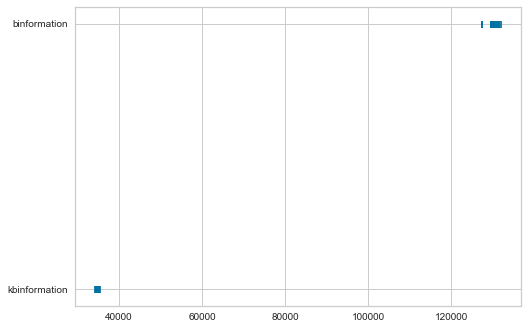

In [37]:
from yellowbrick.text import DispersionPlot
import sklearn.metrics

#Troubleshooting tokens to remove
dispersion_text = [doc.split() for doc in df_metadata["Clean_Content"]]

other_words = [token.split() for token in ['kbinformation','binformation']]

other_words_1D = np.unique(np.concatenate(other_words).reshape(-1))

target_words = other_words_1D

#Create the visualizer and draw the plot
visualizer = DispersionPlot(target_words,ignore_case=False)
_ = visualizer.fit(dispersion_text)

In [38]:
df_metadata.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Length,Abstract_Length,...,Subfield,et_al_Count,RNgrams,RNgrams_Clean_Content,RNgrams_Clean_Content_LongForm,RNgrams_Clean_Content_LongForm_Length,RNgrams_Clean_Content_LongForm_Lemma,RNgrams_Clean_Content_LongForm_Lemma_Stopwords,Clean_Content,Classification
Index,,,,,,,,,,,,,,,,,,,,,
0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,37477,2411,...,Clinical & Counseling Psychology,50,Veterans face a variety of stressors related t...,Veterans face a variety of stressors related t...,Veterans face a variety of stressors related t...,35659,veteran face a variety of stressor relate to t...,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,74025,1577,...,Forensic Psychology,48,The impact of the COVID-19 pandemic on the chi...,The impact of the COVID-19 pandemic on the chi...,The impact of the coronavirus disease 2019 pan...,71115,the impact of the coronavirus disease 2019 pan...,impact coronavirus disease 2019 pandemic child...,impact coronavirus disease 2019 pandemic child...,Covid
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",63568,1842,...,Forensic Psychology,128,"In November 2019, COVID-19—the infectious, hig...","In November 2019, COVID-19—the infectious, hig...","In November 2019, coronavirus disease 2019—the...",57021,"in November 2019 , coronavirus disease 2019 — ...","november 2019 , coronavirus disease 2019 — inf...","november 2019 , coronavirus disease 2019 — inf...",Covid
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,30147,1650,...,Clinical & Counseling Psychology,21,Anxiety and depressive disorders are among the...,Anxiety and depressive disorders are among the...,Anxiety and depressive disorders are among the...,27568,anxiety and depressive disorder be among the m...,anxiety depressive disorder common impair ment...,anxiety depressive disorder common impair ment...,Covid
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",42367,1871,...,Clinical & Counseling Psychology,14,"In mid-March, 2020, the authors—as well as the...","In mid-March, 2020, the authors—as well as the...","In mid-March, 2020, the authors—as well as the...",41246,"in mid - March , 2020 , the author — as well a...","mid - march , 2020 , author — majority therapi...","mid - march , 2020 , author — majority therapi...",Covid


In [40]:
ts_corpus = " ".join(df_metadata["RNgrams_Clean_Content_LongForm_Lemma"])

In [41]:
ts_corpus[ts_corpus.find("binformation")-100:ts_corpus.find("binformation")+50]

'male , across administration format . MeasuresKaufman Brief Intelligence Test , Second Edition the kbinformation technology-2 be a brief , individuall'

In [43]:
compare_corpus = "".join(df_metadata["RNgrams_Clean_Content_LongForm"])

In [45]:
compare_corpus[compare_corpus.find("binformation"):compare_corpus.find("binformation")+20]

''

In [ ]:
compare_corpus.find("intelligence test")

In [ ]:
ts_corpus[1336450:ts_corpus.find("binformation")+50]

In [ ]:
ts_corpus[1336450:1336458+20]

In [ ]:
ts_corpus.find("information technology")

In [ ]:
ts_corpus[160200:160300]

In [ ]:
#Troubleshooting

#df_metadata["Clean_Content"].iloc[38].find("TMH")

#section = df_metadata["Clean_Content"].iloc[38]

#str(section)[1600:1750]

In [ ]:
#Make sure spacy is not splitting on - or else terms may be lost such as e-mental
temp_doc = nlp("forensic e-mental Mr. Davis provider provides providence")
#Lemma Removes e-mental
[(token.text,token.lemma_)for token in temp_doc]

In [ ]:
#df_metadata["emental_Found"] = df_metadata["Content"].apply(lambda text: text.find("forensic emental health"))